### Importing Time Series Data

In [3]:
import pandas as pd

In [4]:
#if we don't do this the datetime info would pass as a string!
#usually makes sense to have datetime as the index!
temp = pd.read_csv("temp.csv", parse_dates = ["datetime"], index_col = "datetime")
temp.head()

,LA,NY
datetime,,
2013-01-01 00:00:00,11.7,-1.1
2013-01-01 01:00:00,10.7,-1.7
2013-01-01 02:00:00,9.9,-2.0
2013-01-01 03:00:00,9.3,-2.1
2013-01-01 04:00:00,8.8,-2.3


In [5]:
#float for temperatures
temp.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 35064 entries, 2013-01-01 00:00:00 to 2016-12-31 23:00:00
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   LA      35062 non-null  float64
 1   NY      35064 non-null  float64
dtypes: float64(2)
memory usage: 821.8 KB


In [6]:
#timestamp is a single point in time!
temp.index[0]

Timestamp('2013-01-01 00:00:00')

In [7]:
#specific pandas data type to store datetime information
type(temp.index[0])

pandas._libs.tslibs.timestamps.Timestamp

In [8]:
temp.index

DatetimeIndex(['2013-01-01 00:00:00', '2013-01-01 01:00:00',
               '2013-01-01 02:00:00', '2013-01-01 03:00:00',
               '2013-01-01 04:00:00', '2013-01-01 05:00:00',
               '2013-01-01 06:00:00', '2013-01-01 07:00:00',
               '2013-01-01 08:00:00', '2013-01-01 09:00:00',
               ...
               '2016-12-31 14:00:00', '2016-12-31 15:00:00',
               '2016-12-31 16:00:00', '2016-12-31 17:00:00',
               '2016-12-31 18:00:00', '2016-12-31 19:00:00',
               '2016-12-31 20:00:00', '2016-12-31 21:00:00',
               '2016-12-31 22:00:00', '2016-12-31 23:00:00'],
              dtype='datetime64[ns]', name='datetime', length=35064, freq=None)

### Converting Strings to datetime objects with pd.to_datetime()

In [10]:
temp = pd.read_csv("temp.csv")
temp.head()

,datetime,LA,NY
0,2013-01-01 00:00:00,11.7,-1.1
1,2013-01-01 01:00:00,10.7,-1.7
2,2013-01-01 02:00:00,9.9,-2.0
3,2013-01-01 03:00:00,9.3,-2.1
4,2013-01-01 04:00:00,8.8,-2.3


In [11]:
#it is currently a string
temp.datetime

0        2013-01-01 00:00:00
1        2013-01-01 01:00:00
2        2013-01-01 02:00:00
3        2013-01-01 03:00:00
4        2013-01-01 04:00:00
                ...         
35059    2016-12-31 19:00:00
35060    2016-12-31 20:00:00
35061    2016-12-31 21:00:00
35062    2016-12-31 22:00:00
35063    2016-12-31 23:00:00
Name: datetime, Length: 35064, dtype: object

In [12]:
#this is how to convert to datetime (this doesn't make the change yet) 
pd.to_datetime(temp.datetime)

0       2013-01-01 00:00:00
1       2013-01-01 01:00:00
2       2013-01-01 02:00:00
3       2013-01-01 03:00:00
4       2013-01-01 04:00:00
                ...        
35059   2016-12-31 19:00:00
35060   2016-12-31 20:00:00
35061   2016-12-31 21:00:00
35062   2016-12-31 22:00:00
35063   2016-12-31 23:00:00
Name: datetime, Length: 35064, dtype: datetime64[ns]

In [13]:
temp = temp.set_index(pd.to_datetime(temp.datetime)).drop("datetime", axis = 1)

In [14]:
temp.head()

,LA,NY
datetime,,
2013-01-01 00:00:00,11.7,-1.1
2013-01-01 01:00:00,10.7,-1.7
2013-01-01 02:00:00,9.9,-2.0
2013-01-01 03:00:00,9.3,-2.1
2013-01-01 04:00:00,8.8,-2.3


In [15]:
pd.to_datetime("2015-05-20")

Timestamp('2015-05-20 00:00:00')

In [16]:
pd.to_datetime("2015-05-20 10:30")

Timestamp('2015-05-20 10:30:00')

In [17]:
pd.to_datetime("2015-05-20 10:30:20")

Timestamp('2015-05-20 10:30:20')

In [18]:
pd.to_datetime("20150401")

Timestamp('2015-04-01 00:00:00')

In [19]:
pd.to_datetime("2015 04 01")

Timestamp('2015-04-01 00:00:00')

In [20]:
pd.to_datetime("2015/04/01")

Timestamp('2015-04-01 00:00:00')

In [21]:
pd.to_datetime("2015 May 01")

Timestamp('2015-05-01 00:00:00')

In [22]:
pd.to_datetime("2015 May 20th")

Timestamp('2015-05-20 00:00:00')

In [23]:
#there is hardly any combination which doesn't work!

### Initial Analysis / Visual Inspection of Time Series

In [25]:
temp.head()

,LA,NY
datetime,,
2013-01-01 00:00:00,11.7,-1.1
2013-01-01 01:00:00,10.7,-1.7
2013-01-01 02:00:00,9.9,-2.0
2013-01-01 03:00:00,9.3,-2.1
2013-01-01 04:00:00,8.8,-2.3


In [26]:
#some missing values for LA
temp.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 35064 entries, 2013-01-01 00:00:00 to 2016-12-31 23:00:00
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   LA      35062 non-null  float64
 1   NY      35064 non-null  float64
dtypes: float64(2)
memory usage: 821.8 KB


In [27]:
temp.describe()

,LA,NY
count,35062.000000,35064.000000
mean,17.486016,12.068269
std,6.640666,10.466832
min,-6.600000,-22.400000
25%,12.900000,3.900000
50%,17.200000,12.500000
75%,21.900000,20.600000
max,42.300000,37.100000


In [28]:
temp.LA.value_counts()

 16.2    238
 16.7    237
 15.2    234
 18.2    231
 16.6    228
        ... 
-5.9       1
-6.5       1
-6.6       1
-2.2       1
-3.3       1
Name: LA, Length: 442, dtype: int64

[]

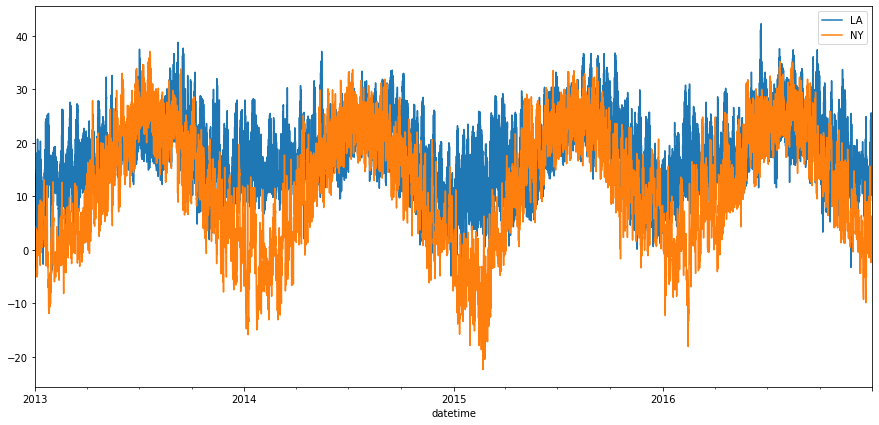

In [29]:
import matplotlib.pyplot as plt
temp.plot(kind = "line", figsize = (15,7))
plt.plot()

[]

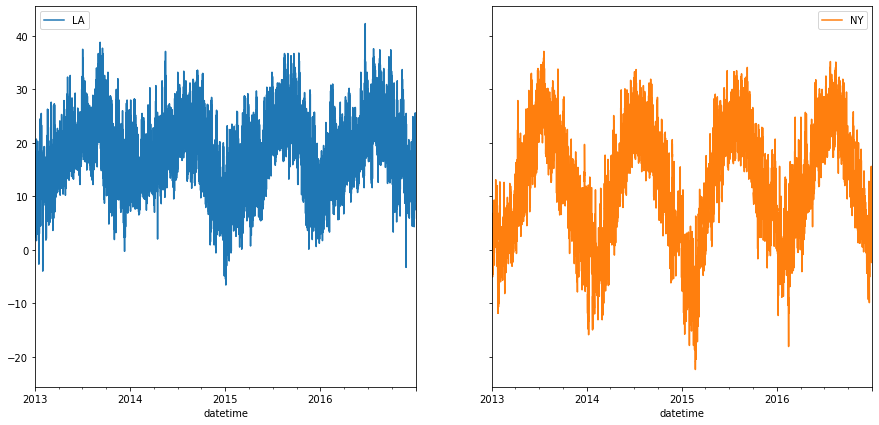

In [30]:
temp.plot(kind = "line", figsize = (15,7), subplots = True, layout = (1,2), sharey = True)
plt.plot()

In [31]:
#for visualising our time series it might make more sense
#to transform to weekly or monthly data instead of hourly

### Indexing and Slicing Time Series

In [33]:
temp = pd.read_csv("temp.csv", parse_dates = ["datetime"], index_col = "datetime")
temp.head()

,LA,NY
datetime,,
2013-01-01 00:00:00,11.7,-1.1
2013-01-01 01:00:00,10.7,-1.7
2013-01-01 02:00:00,9.9,-2.0
2013-01-01 03:00:00,9.3,-2.1
2013-01-01 04:00:00,8.8,-2.3


In [34]:
#this still works
temp.loc["2013-01-01 03:00:00"]

LA    9.3
NY   -2.1
Name: 2013-01-01 03:00:00, dtype: float64

In [35]:
#we can also loc just the year!!
temp.loc["2015"]

,LA,NY
datetime,,
2015-01-01 00:00:00,3.8,-5.1
2015-01-01 01:00:00,4.4,-5.1
2015-01-01 02:00:00,3.2,-6.0
2015-01-01 03:00:00,1.2,-6.0
2015-01-01 04:00:00,0.2,-6.0
...,...,...
2015-12-31 19:00:00,16.0,8.1
2015-12-31 20:00:00,16.0,8.1
2015-12-31 21:00:00,16.4,7.9


In [36]:
#all may 2015 on the 20th
temp.loc["2015-05-20"].head()

,LA,NY
datetime,,
2015-05-20 00:00:00,17.7,19.8
2015-05-20 01:00:00,18.0,19.7
2015-05-20 02:00:00,16.6,19.0
2015-05-20 03:00:00,14.4,19.0
2015-05-20 04:00:00,13.3,19.7


In [37]:
#we can also slice for periods
temp.loc["2015-01-01" : "2015-12-31"]

,LA,NY
datetime,,
2015-01-01 00:00:00,3.8,-5.1
2015-01-01 01:00:00,4.4,-5.1
2015-01-01 02:00:00,3.2,-6.0
2015-01-01 03:00:00,1.2,-6.0
2015-01-01 04:00:00,0.2,-6.0
...,...,...
2015-12-31 19:00:00,16.0,8.1
2015-12-31 20:00:00,16.0,8.1
2015-12-31 21:00:00,16.4,7.9


In [38]:
temp.loc["2015-01-01" : "2015-12-31"].equals(temp.loc["2015"])

True

In [39]:
#we can also use different formats still!
temp.loc["20FEBRUARY2015"].head()

,LA,NY
datetime,,
2015-02-20 00:00:00,16.4,-12.4
2015-02-20 01:00:00,17.5,-12.4
2015-02-20 02:00:00,14.6,-14.5
2015-02-20 03:00:00,13.9,-14.5
2015-02-20 04:00:00,10.3,-14.5


In [40]:
#we can ALSO just pass 2 dates for example
temp.loc[["2015-04-01", "2015-05-02"]]

,LA,NY
datetime,,
2015-04-01,20.5,5.4
2015-05-02,24.7,15.2


### Creating a customised DatetimeIndex with pd.date_range()

In [42]:
pd.to_datetime(["2015-05-20", "20 FEb 2015"])

DatetimeIndex(['2015-05-20', '2015-02-20'], dtype='datetime64[ns]', freq=None)

In [43]:
#but lets say we don't wanna manually pass every datetime manually
#then we use date range!!
#by default it will be daily frequency!
pd.date_range(start = "2015-07-01", end = "2015-07-11", freq = "D")

DatetimeIndex(['2015-07-01', '2015-07-02', '2015-07-03', '2015-07-04',
               '2015-07-05', '2015-07-06', '2015-07-07', '2015-07-08',
               '2015-07-09', '2015-07-10', '2015-07-11'],
              dtype='datetime64[ns]', freq='D')

In [44]:
#change frequency to every 2 days
pd.date_range(start = "2015-07-01", end = "2015-07-11", freq = "2D")

DatetimeIndex(['2015-07-01', '2015-07-03', '2015-07-05', '2015-07-07',
               '2015-07-09', '2015-07-11'],
              dtype='datetime64[ns]', freq='2D')

In [45]:
#alternatively, you can specify how many periods you want withiout explicitly specifying the end
pd.date_range(start = "2015-07-01", periods = 12, freq = "D")

DatetimeIndex(['2015-07-01', '2015-07-02', '2015-07-03', '2015-07-04',
               '2015-07-05', '2015-07-06', '2015-07-07', '2015-07-08',
               '2015-07-09', '2015-07-10', '2015-07-11', '2015-07-12'],
              dtype='datetime64[ns]', freq='D')

In [46]:
#alternatively you can set the end date instead!
pd.date_range(end = "2015-07-12", periods = 12, freq = "D")

DatetimeIndex(['2015-07-01', '2015-07-02', '2015-07-03', '2015-07-04',
               '2015-07-05', '2015-07-06', '2015-07-07', '2015-07-08',
               '2015-07-09', '2015-07-10', '2015-07-11', '2015-07-12'],
              dtype='datetime64[ns]', freq='D')

In [47]:
#only business days
pd.date_range(start = "2015-07-01", end = "2015-07-11", freq = "B")

DatetimeIndex(['2015-07-01', '2015-07-02', '2015-07-03', '2015-07-06',
               '2015-07-07', '2015-07-08', '2015-07-09', '2015-07-10'],
              dtype='datetime64[ns]', freq='B')

In [48]:
#hourly frequency
pd.date_range(start = "2015-07-01", periods = 12, freq = "h")

DatetimeIndex(['2015-07-01 00:00:00', '2015-07-01 01:00:00',
               '2015-07-01 02:00:00', '2015-07-01 03:00:00',
               '2015-07-01 04:00:00', '2015-07-01 05:00:00',
               '2015-07-01 06:00:00', '2015-07-01 07:00:00',
               '2015-07-01 08:00:00', '2015-07-01 09:00:00',
               '2015-07-01 10:00:00', '2015-07-01 11:00:00'],
              dtype='datetime64[ns]', freq='H')

In [49]:
#weekly frequency
pd.date_range(start = "2015-07-01", periods = 6, freq = "W")

DatetimeIndex(['2015-07-05', '2015-07-12', '2015-07-19', '2015-07-26',
               '2015-08-02', '2015-08-09'],
              dtype='datetime64[ns]', freq='W-SUN')

In [50]:
#weekly only on wednesday
pd.date_range(start = "2015-07-01", periods = 6, freq = "W-Wed")

DatetimeIndex(['2015-07-01', '2015-07-08', '2015-07-15', '2015-07-22',
               '2015-07-29', '2015-08-05'],
              dtype='datetime64[ns]', freq='W-WED')

In [51]:
#monthly (its a bit weird because it will take the last day of the month)
pd.date_range(start = "2015-07-14", periods = 6, freq = "M")

DatetimeIndex(['2015-07-31', '2015-08-31', '2015-09-30', '2015-10-31',
               '2015-11-30', '2015-12-31'],
              dtype='datetime64[ns]', freq='M')

In [52]:
#monthly (if you want the START of the month)
pd.date_range(start = "2015-07-14", periods = 6, freq = "MS")

DatetimeIndex(['2015-08-01', '2015-09-01', '2015-10-01', '2015-11-01',
               '2015-12-01', '2016-01-01'],
              dtype='datetime64[ns]', freq='MS')

In [53]:
#monthly (if you want the same date each month)
pd.date_range(start = "2015-07-14", periods = 6, freq = pd.DateOffset(months = 1))

DatetimeIndex(['2015-07-14', '2015-08-14', '2015-09-14', '2015-10-14',
               '2015-11-14', '2015-12-14'],
              dtype='datetime64[ns]', freq='<DateOffset: months=1>')

In [54]:
#quarterly (its a bit weird because it will take the last day of the quarter)
#same exact thing as monthly
pd.date_range(start = "2015-07-14", periods = 6, freq = "Q")

DatetimeIndex(['2015-09-30', '2015-12-31', '2016-03-31', '2016-06-30',
               '2016-09-30', '2016-12-31'],
              dtype='datetime64[ns]', freq='Q-DEC')

In [55]:
pd.date_range(start = "2015-07-14", periods = 6, freq = "QS")

DatetimeIndex(['2015-10-01', '2016-01-01', '2016-04-01', '2016-07-01',
               '2016-10-01', '2017-01-01'],
              dtype='datetime64[ns]', freq='QS-JAN')

In [56]:
#yearly (its a bit weird because it will take the last day of the year)
pd.date_range(start = "2015-07-14", periods = 6, freq = "A")

DatetimeIndex(['2015-12-31', '2016-12-31', '2017-12-31', '2018-12-31',
               '2019-12-31', '2020-12-31'],
              dtype='datetime64[ns]', freq='A-DEC')

In [57]:
pd.date_range(start = "2015-07-14", periods = 6, freq = "AS-JUN")

DatetimeIndex(['2016-06-01', '2017-06-01', '2018-06-01', '2019-06-01',
               '2020-06-01', '2021-06-01'],
              dtype='datetime64[ns]', freq='AS-JUN')

In [58]:
pd.date_range(start = "2015-07-14", periods = 6, freq = pd.DateOffset(years = 1))

DatetimeIndex(['2015-07-14', '2016-07-14', '2017-07-14', '2018-07-14',
               '2019-07-14', '2020-07-14'],
              dtype='datetime64[ns]', freq='<DateOffset: years=1>')

### Downsampling Time Series with resample()

In [60]:
temp = pd.read_csv("temp.csv", parse_dates = ["datetime"], index_col = "datetime")
temp.head()
#hourly data! might be a bit too much for example for our graphs

,LA,NY
datetime,,
2013-01-01 00:00:00,11.7,-1.1
2013-01-01 01:00:00,10.7,-1.7
2013-01-01 02:00:00,9.9,-2.0
2013-01-01 03:00:00,9.3,-2.1
2013-01-01 04:00:00,8.8,-2.3


In [61]:
#it essentially works like the group by
#it will create various groups one for each day!
temp.resample("D")

In [62]:
#list(temp.resample("D"))

In [63]:
#works like group by! we have a tuple!
type(list(temp.resample("D"))[1])

tuple

In [64]:
#all the hours for that particular day
list(temp.resample("D"))[1][1].head()

,LA,NY
datetime,,
2013-01-02 00:00:00,13.2,2.6
2013-01-02 01:00:00,11.8,2.7
2013-01-02 02:00:00,10.5,2.9
2013-01-02 03:00:00,9.5,2.9
2013-01-02 04:00:00,8.3,2.9


In [65]:
#just like for group by we need to aggregate data for the groups!
#THIS TAKES THE MEAN TEMPERATURE OF EACH DAY AND ASSIGNS IT TO THE DAY
temp.resample("D").mean().head()

,LA,NY
datetime,,
2013-01-01,8.858333,-0.404167
2013-01-02,9.283333,3.208333
2013-01-03,10.304167,-2.425000
2013-01-04,11.512500,-2.070833
2013-01-05,11.083333,0.816667


In [66]:
#OR take the first value
temp.resample("2h").first().head()

,LA,NY
datetime,,
2013-01-01 00:00:00,11.7,-1.1
2013-01-01 02:00:00,9.9,-2.0
2013-01-01 04:00:00,8.8,-2.3
2013-01-01 06:00:00,6.9,-3.2
2013-01-01 08:00:00,6.7,-3.0


In [67]:
#OR take the first value
temp.resample("2h").first().head()

,LA,NY
datetime,,
2013-01-01 00:00:00,11.7,-1.1
2013-01-01 02:00:00,9.9,-2.0
2013-01-01 04:00:00,8.8,-2.3
2013-01-01 06:00:00,6.9,-3.2
2013-01-01 08:00:00,6.7,-3.0


In [68]:
#this resamples but takes weeks wednesday to wednesdays
temp.resample("W-Wed").mean().head()

,LA,NY
datetime,,
2013-01-02,9.070833,1.402083
2013-01-09,11.033333,1.033929
2013-01-16,8.870238,6.001190
2013-01-23,14.678571,1.010714
2013-01-30,12.554762,-4.382738


In [69]:
#MS stands for month start
temp.resample("MS").mean().head()

,LA,NY
datetime,,
2013-01-01,11.596237,1.129570
2013-02-01,12.587202,0.617857
2013-03-01,15.069946,3.719220
2013-04-01,16.487361,10.699306
2013-05-01,19.005780,15.824328


In [70]:
#MS stands for month start
temp.resample("M").mean().head()

,LA,NY
datetime,,
2013-01-31,11.596237,1.129570
2013-02-28,12.587202,0.617857
2013-03-31,15.069946,3.719220
2013-04-30,16.487361,10.699306
2013-05-31,19.005780,15.824328


When you resample using "MS" (Month Start) or "M" (Month End), the grouping logic is the same:

- Both methods take all the hourly data in each month and compute the average.
- The only difference is whether the resulting index is the first day (MS) or the last day (M) of the month.

In [72]:
temp.resample("AS").mean()

,LA,NY
datetime,,
2013-01-01,17.174229,12.196153
2014-01-01,17.245616,11.370959
2015-01-01,17.191530,11.795194
2016-01-01,18.330305,12.908470


### Downsampling and the PeriodIndex
- Context: previously we were taking the temperature average for each month for example. We then had to assign an index (M vs ME). The value inside is the same.
- Why do we assign a ME for example? why not assign a period which specifies its the average between x and y dates?
- Currently each index is a TIMESTAMP. We want to change each index into a corresponding PERIOD

In [74]:
temp_m = temp.resample("M").mean()
temp_m.index = temp_m.index.to_period("M")
temp_m.head()

,LA,NY
datetime,,
2013-01,11.596237,1.129570
2013-02,12.587202,0.617857
2013-03,15.069946,3.719220
2013-04,16.487361,10.699306
2013-05,19.005780,15.824328


In [75]:
temp_q = temp.resample("QS").mean()
temp_q.index = temp_q.index.to_period("Q")
temp_q.head()

,LA,NY
datetime,,
2013Q1,13.099212,1.862361
2013Q2,18.472115,16.245101
2013Q3,21.999638,22.411594
2013Q4,15.047781,8.084918
2014Q1,15.508287,-0.570880


In [76]:
temp_q.index[0]

Period('2013Q1', 'Q-DEC')

In [77]:
temp.index[0]

Timestamp('2013-01-01 00:00:00')

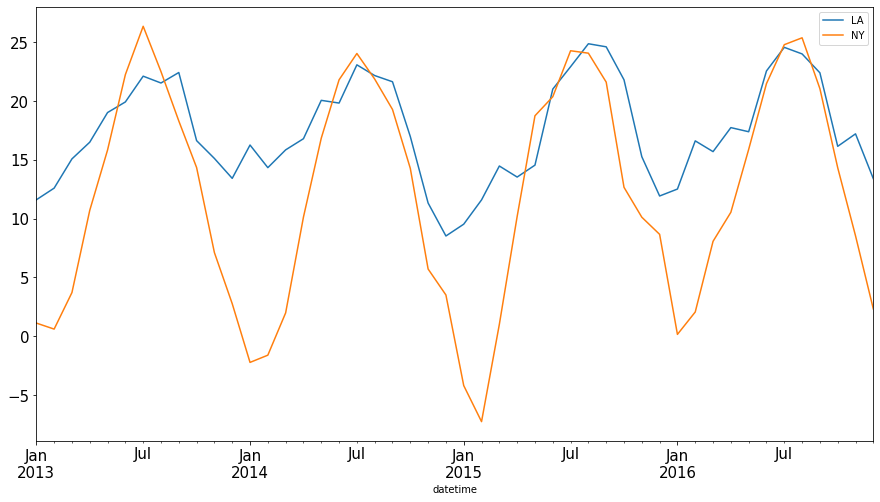

In [78]:
temp_m.plot(figsize = (15,8), fontsize = 15)
plt.show()

In [79]:
#we can also convert a period back into a datetime index!
temp_m.to_timestamp(how = "start").head()

,LA,NY
datetime,,
2013-01-01,11.596237,1.129570
2013-02-01,12.587202,0.617857
2013-03-01,15.069946,3.719220
2013-04-01,16.487361,10.699306
2013-05-01,19.005780,15.824328
